In [1]:
import sys 
if sys.version_info[0] < 3: 
    raise Exception("Python 3 not detected.")
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import io
for data_name in ["spam"]: 
    spam_data = io.loadmat("spam-data/%s_data.mat" % data_name) 
    print("\nloaded %s data!" % data_name) 
    fields = "test_data", "training_data", "training_labels" 
    for field in fields: 
        print(field, spam_data[field].shape)


loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)


In [2]:
for data_name in ["mnist"]: 
    mnist_data = io.loadmat("mnist-data/%s_data.mat" % data_name) 
    print("\nloaded %s data!" % data_name) 
    fields = "test_data", "training_data", "training_labels" 
    for field in fields: 
        print(field, mnist_data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)


In [3]:
#part (a)

In [4]:
mnist_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Feb 13 17:30:33 2019',
 '__version__': '1.0',
 '__globals__': [],
 'training_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_labels': array([[8],
        [2],
        [7],
        ...,
        [3],
        [6],
        [0]], dtype=uint8),
 'test_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
spam_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Jan  6 19:03:17 2019',
 '__version__': '1.0',
 '__globals__': [],
 'training_data': array([[0., 2., 0., ..., 9., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 3., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'training_labels': array([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]], dtype=int64),
 'test_data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 3., 0., 0.]])}

In [6]:
mtrain = mnist_data['training_data']

In [8]:
#part (a) asks us to fit a Gaussian distribution to each digit class. 

In [9]:
maverage = np.mean(mtrain)
mtrain = mtrain - maverage
contrast = np.sqrt(10 + np.mean(mtrain**2))
mtrain = mtrain / max(contrast, 0.000000001)
#attempt at contrast normalization before using pixel values.
#external source used: 
#https://datascience.stackexchange.com/questions/15110/how-to-implement-global-contrast-normalization-in-python?rq=1

In [10]:
#we will compute a mean and covariance matrix for each digit class

In [11]:
uniques = np.unique(mnist_data['training_labels'])

In [12]:
uniques

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
indexlst = []
for i in uniques: 
    templst = [x for x in range(len(mnist_data['training_labels'])) if mnist_data['training_labels'][x] == i]
    indexlst.append(templst)
#building a list of lists of indices to map the training points to their corresponding digit class.

In [14]:
from scipy.stats import multivariate_normal
matrix_of_cov_matrices = []
matrix_of_means = []
gaussians = []
for i in indexlst:
    mcov = np.cov(mtrain[i], bias = True, rowvar = False)
    for j in range(len(mcov)):
        mcov[j][j] += 0.1
    #computes the covariance matrix for each digit class.
    #uses the trick from question 6b to solve the singular covariance matrix problem.
    m_mean = np.mean(mtrain[i], axis = 0)
    matrix_of_cov_matrices.append(mcov)
    matrix_of_means.append(m_mean)
    #computes the mean for each digit class.
    digit_gaussian = multivariate_normal(m_mean, mcov)
    gaussians.append(digit_gaussian)
    #fitting the gaussian distribution to each digit class.

In [15]:
#part (b)---Visualize the covariance matrix for a particular class (digit). How do the
#diagonal terms compare with the off-diagonal terms? What do you conclude from this?

In [16]:
np.corrcoef(matrix_of_cov_matrices[0])

array([[ 1.        , -0.00127714, -0.00127714, ..., -0.00127714,
        -0.00127714, -0.00127714],
       [-0.00127714,  1.        , -0.00127714, ..., -0.00127714,
        -0.00127714, -0.00127714],
       [-0.00127714, -0.00127714,  1.        , ..., -0.00127714,
        -0.00127714, -0.00127714],
       ...,
       [-0.00127714, -0.00127714, -0.00127714, ...,  1.        ,
        -0.00127714, -0.00127714],
       [-0.00127714, -0.00127714, -0.00127714, ..., -0.00127714,
         1.        , -0.00127714],
       [-0.00127714, -0.00127714, -0.00127714, ..., -0.00127714,
        -0.00127714,  1.        ]])

In [17]:
len(np.unique(np.corrcoef(matrix_of_cov_matrices[0])))

237484

It appears that the correlation coefficient matrix of the covariance matrix for the class 0 shows that the diagonal terms are equal to each other and that the diagonal terms are larger than the off-diagonal terms. I conclude from this that the diagonal entries are the correlation of a given feature with itself (hence why it's 1), and that the correlation between different features is generally strong and negative, but appears to increase as you move down and right in the matrix. 

In [18]:
#part(c): attempting LDA first.

In [19]:
avg_cov = np.zeros((784, 784))
for i in range(len(matrix_of_cov_matrices)):
    avg_cov = np.add(avg_cov, matrix_of_cov_matrices[i])
#finding the average covariance matrix across the classes.

In [20]:
avg_cov = avg_cov/10

In [21]:
avg_cov

array([[1.00000000e-01, 4.70600828e-28, 4.70600828e-28, ...,
        4.70600828e-28, 4.70600828e-28, 4.70600828e-28],
       [4.70600828e-28, 1.00000000e-01, 4.70600828e-28, ...,
        4.70600828e-28, 4.70600828e-28, 4.70600828e-28],
       [4.70600828e-28, 4.70600828e-28, 1.00000000e-01, ...,
        4.70600828e-28, 4.70600828e-28, 4.70600828e-28],
       ...,
       [4.70600828e-28, 4.70600828e-28, 4.70600828e-28, ...,
        1.00000000e-01, 4.70600828e-28, 4.70600828e-28],
       [4.70600828e-28, 4.70600828e-28, 4.70600828e-28, ...,
        4.70600828e-28, 1.00000000e-01, 4.70600828e-28],
       [4.70600828e-28, 4.70600828e-28, 4.70600828e-28, ...,
        4.70600828e-28, 4.70600828e-28, 1.00000000e-01]])

In [37]:
indices_to_choose = np.arange(len(mtrain))
valid_indices = np.random.choice(indices_to_choose, 10000, replace = False)
mvalid = mtrain[valid_indices]
#creating the validation set of 10,000 randomly selected points
t_indices = np.arange(60000)

In [38]:
def diff(first, second):
    second = set(second)
    return [item for item in first if item not in second]
valid_indices = diff(t_indices, valid_indices)
#creating a list of valid indices in the training set (that are not in the validation set.)

In [36]:
def loss_fn(labels1, labels2):
    total_loss = 0
    for i in range(len(labels1)):
        if labels1[i] != labels2[i]:
            total_loss += 1
    return total_loss

In [44]:
avg_digit_gaussians = []
for mean in matrix_of_means:
    avg_digit_gaussians.append(multivariate_normal(mean, avg_cov))
#for lda, we keep covariance the same across classes----we thus compute new multivariate normals.

In [57]:
sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
training_losses = []
valid_losses = []
#training set sizes
for size in sizes:
    training_indices = np.random.choice(valid_indices, size, replace = False)
    temp_training_set = mtrain[training_indices]
    #getting the training set of size size.
    predicted_labels = []
    for point in temp_training_set:
        temp_class_densities = []
        for gaussian in avg_digit_gaussians:
            temp_class_densities.append(gaussian.logpdf(point))
        maximum = max(temp_class_densities)
        predicted_labels.append(temp_class_densities.index(maximum))
        #the assigned label is the class associated with the maximum density
    true_labels = mnist_data['training_labels'][training_indices]
    loss = loss_fn(predicted_labels, true_labels)
    training_losses.append(loss)
    predicted_vlabels = []
    for point1 in mvalid: 
        temp_valid_class_densities = []
        for gaussian in avg_digit_gaussians:
            temp_valid_class_densities.append(gaussian.logpdf(point1))
        maximum = max(temp_valid_class_densities)
        predicted_vlabels.append(temp_valid_class_densities.index(maximum))
    true_vlabels = mnist_data['training_labels'][valid_indices]
    vloss = loss_fn(predicted_vlabels, true_vlabels)
    valid_losses.append(vloss)
#computing the validation set errors and     
#computing the training set errors.

Text(0.5, 0, 'Training Set size')

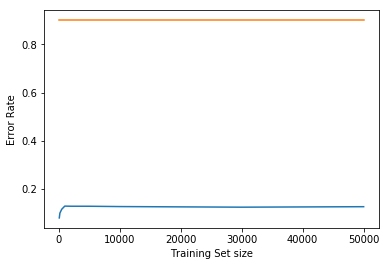

In [58]:
terror_rates = [training_losses[i]/sizes[i] for i in range(len(training_losses))]
verror_rates = [valid_losses[i]/10000 for i in range(len(valid_losses))]
plt.plot(sizes, terror_rates)
plt.plot(sizes, verror_rates)
plt.ylabel('Error Rate')
plt.xlabel('Training Set size')
#plotting the error rates against training_set size.

In [56]:
#now for qda, covariance is allowed to vary across classes, so we use the gaussians from part (a)
#the gaussians variable.

In [59]:
sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
qtraining_losses = []
qvalid_losses = []
#training set sizes
for size in sizes:
    training_indices = np.random.choice(valid_indices, size, replace = False)
    temp_training_set = mtrain[training_indices]
    #getting the training set of size size.
    predicted_labels = []
    for point in temp_training_set:
        temp_class_densities = []
        for gaussian in gaussians:
            temp_class_densities.append(gaussian.logpdf(point))
        maximum = max(temp_class_densities)
        predicted_labels.append(temp_class_densities.index(maximum))
        #the assigned label is the class associated with the maximum density
    true_labels = mnist_data['training_labels'][training_indices]
    loss = loss_fn(predicted_labels, true_labels)
    qtraining_losses.append(loss)
    predicted_vlabels = []
    for point1 in mvalid: 
        temp_valid_class_densities = []
        for gaussian in gaussians:
            temp_valid_class_densities.append(gaussian.logpdf(point1))
        maximum = max(temp_valid_class_densities)
        predicted_vlabels.append(temp_valid_class_densities.index(maximum))
    true_vlabels = mnist_data['training_labels'][valid_indices]
    vloss = loss_fn(predicted_vlabels, true_vlabels)
    qvalid_losses.append(vloss)
#computing the validation set errors and     
#computing the training set errors.

Text(0.5, 0, 'Training Set size')

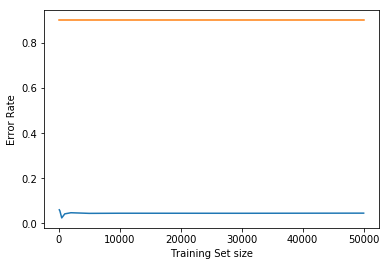

In [60]:
qterror_rates = [qtraining_losses[i]/sizes[i] for i in range(len(qtraining_losses))]
qverror_rates = [qvalid_losses[i]/10000 for i in range(len(qvalid_losses))]
plt.plot(sizes, qterror_rates)
plt.plot(sizes, qverror_rates)
plt.ylabel('Error Rate')
plt.xlabel('Training Set size')
#plotting the error rates against training_set size.

In [64]:
#part(4) kaggle submission
#choosing to use QDA since lower error rates in training.
from save_csv import results_to_csv
mtest = mnist_data['test_data']
kaggle_labels = []
for point in mtest:
    kaggle_temp_class_densities = []
    for gaussian in gaussians:
        kaggle_temp_class_densities.append(gaussian.logpdf(point))
    maximum = max(kaggle_temp_class_densities)
    kaggle_labels.append(kaggle_temp_class_densities.index(maximum))
results_to_csv(np.array(kaggle_labels))

Text(0.5, 0, 'Training Set size')

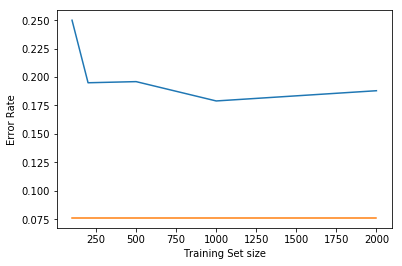

In [91]:
#part (d): I will use LDA for spam.
spam_train = spam_data['training_data']
spam_labels = spam_data['training_labels']
spam_test = spam_data['test_data']

uniques = np.unique(spam_labels)
indexlst = []
for i in uniques: 
    templst = [x for x in range(len(spam_labels)) if spam_labels[x] == i]
    indexlst.append(templst)
#building a list of lists of indices to map the training points to their corresponding digit class.
smatrix_of_cov_matrices = []
smatrix_of_means = []
sgaussians = []

for i in indexlst:
    scov = np.cov(spam_train[i], bias = True, rowvar = False)
    for j in range(len(scov)):
        scov[j][j] += 0.1
    #computes the covariance matrix for each digit class.
    #uses the trick from question 6b to solve the singular covariance matrix problem.
    s_mean = np.mean(spam_train[i], axis = 0)
    smatrix_of_cov_matrices.append(scov)
    smatrix_of_means.append(s_mean)
    #computes the mean for each digit class.
    digit_gaussian = multivariate_normal(s_mean, scov)
    sgaussians.append(digit_gaussian)
    #fitting the gaussian distribution to each digit class.
avg_cov = np.zeros((32, 32))
for i in range(len(smatrix_of_cov_matrices)):
    avg_cov = np.add(avg_cov, smatrix_of_cov_matrices[i])
#finding the average covariance matrix across the classes.
avg_cov = avg_cov/2
spam_gaussians = []
for mean in smatrix_of_means:
    spam_gaussians.append(multivariate_normal(mean, avg_cov))
#for lda, we keep covariance the same across classes----we thus compute new multivariate normals.
sgaussians = spam_gaussians
sizes = [100, 200, 500, 1000, 2000]
qtraining_losses = []
qvalid_losses = []
indices_to_choose = np.arange(len(spam_train))
valid_indices = np.random.choice(indices_to_choose, 1000, replace = False)
spam_valid = spam_train[valid_indices]
#creating the validation set of 10,000 randomly selected points
t_indices = np.arange(5172)
valid_indices = diff(t_indices, valid_indices)
#training set sizes
for size in sizes:
    training_indices = np.random.choice(valid_indices, size, replace = False)
    temp_training_set = spam_train[training_indices]
    #getting the training set of size size.
    predicted_labels = []
    for point in temp_training_set:
        temp_class_densities = []
        for gaussian in sgaussians:
            temp_class_densities.append(gaussian.logpdf(point))
        maximum = max(temp_class_densities)
        predicted_labels.append(temp_class_densities.index(maximum))
        #the assigned label is the class associated with the maximum density
    true_labels = spam_labels[training_indices]
    loss = loss_fn(predicted_labels, true_labels)
    qtraining_losses.append(loss)
    predicted_vlabels = []
    for point1 in spam_valid: 
        temp_valid_class_densities = []
        for gaussian in sgaussians:
            temp_valid_class_densities.append(gaussian.logpdf(point1))
        maximum = max(temp_valid_class_densities)
        predicted_vlabels.append(temp_valid_class_densities.index(maximum))
    true_vlabels = spam_labels[valid_indices]
    vloss = loss_fn(predicted_vlabels, true_vlabels)
    qvalid_losses.append(vloss)

qterror_rates = [qtraining_losses[i]/sizes[i] for i in range(len(qtraining_losses))]
qverror_rates = [qvalid_losses[i]/10000 for i in range(len(qvalid_losses))]
plt.plot(sizes, qterror_rates)
plt.plot(sizes, qverror_rates)
plt.ylabel('Error Rate')
plt.xlabel('Training Set size')

In [92]:
#plotting the error rates against training_set size.
kaggle_labels = []
for point in spam_test:
    kaggle_temp_class_densities = []
    for gaussian in sgaussians:
        kaggle_temp_class_densities.append(gaussian.logpdf(point))
    maximum = max(kaggle_temp_class_densities)
    kaggle_labels.append(kaggle_temp_class_densities.index(maximum))
results_to_csv(np.array(kaggle_labels))